# **PREDIKSI GPA MENGGUNAKAN MULTIPLE LINEAR REGRESSION**

## DATA IMPORT

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import io
import math
from google.colab import files
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
uploaded = files.upload()

Saving student_performance_data_raw.csv to student_performance_data_raw.csv


In [ ]:
df = pd.read_csv(r"/content/student_performance_data_raw.csv")

## DATA PREPROCESSING

In [ ]:
df

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA
0,17,Female,Caucasian,Some College,19.833723,7,Yes,Moderate,No,No,Yes,No,2.929196
1,18,Male,Caucasian,High School,15.408756,0,No,Low,No,No,No,No,3.042915
2,15,Male,Asian,Bachelor's,4.210570,26,No,Moderate,No,No,No,No,0.112602
3,17,Female,Caucasian,Bachelor's,10.028829,14,No,High,Yes,No,No,No,2.054218
4,17,Female,Caucasian,Some College,4.672495,17,Yes,High,No,No,No,No,1.288061
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,18,Female,Caucasian,Bachelor's,10.680555,2,No,Very High,Yes,No,No,No,3.455509
2388,17,Male,Caucasian,High School,7.583217,4,Yes,Very High,No,Yes,No,No,3.279150
2389,16,Female,Caucasian,Some College,6.805500,20,No,Moderate,No,No,No,Yes,1.142333
2390,16,Female,African American,NaN,12.416653,17,No,Moderate,No,Yes,Yes,No,1.803297


In [ ]:
df.isnull().sum()

,0
Age,0
Gender,0
Ethnicity,0
ParentalEducation,243
StudyTimeWeekly,0
Absences,0
Tutoring,0
ParentalSupport,212
Extracurricular,0
Sports,0


MISSING VALUE TREATMENT

In [ ]:
# DELETE THE NaN VALUE DATA -> Jika mengganti nilai NaN value dengan MODUS DATA, maka akurasi akan turun menjadi 94,5%
df.dropna(inplace=True)
df

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA
0,17,Female,Caucasian,Some College,19.833723,7,Yes,Moderate,No,No,Yes,No,2.929196
1,18,Male,Caucasian,High School,15.408756,0,No,Low,No,No,No,No,3.042915
2,15,Male,Asian,Bachelor's,4.210570,26,No,Moderate,No,No,No,No,0.112602
3,17,Female,Caucasian,Bachelor's,10.028829,14,No,High,Yes,No,No,No,2.054218
4,17,Female,Caucasian,Some College,4.672495,17,Yes,High,No,No,No,No,1.288061
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2386,16,Male,Caucasian,Some College,13.814021,14,No,Moderate,No,No,No,No,2.000084
2387,18,Female,Caucasian,Bachelor's,10.680555,2,No,Very High,Yes,No,No,No,3.455509
2388,17,Male,Caucasian,High School,7.583217,4,Yes,Very High,No,Yes,No,No,3.279150
2389,16,Female,Caucasian,Some College,6.805500,20,No,Moderate,No,No,No,Yes,1.142333


In [ ]:
df.isnull().sum()

,0
Age,0
Gender,0
Ethnicity,0
ParentalEducation,0
StudyTimeWeekly,0
Absences,0
Tutoring,0
ParentalSupport,0
Extracurricular,0
Sports,0


DATA DUPLICATES CHECKING

In [ ]:
df.duplicated().sum()

0

DATA ENCODING

In [ ]:
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
df['Tutoring'] = df['Tutoring'].map({'No': 0, 'Yes': 1})
df['Extracurricular'] = df['Extracurricular'].map({'No': 0, 'Yes': 1})
df['Sports'] = df['Sports'].map({'No': 0, 'Yes': 1})
df['Music'] = df['Music'].map({'No': 0, 'Yes': 1})
df['Volunteering'] = df['Volunteering'].map({'No': 0, 'Yes': 1})

df = df.join(pd.get_dummies(df.Ethnicity, dtype=int)).drop('Ethnicity', axis=1)
df = df.join(pd.get_dummies(df.ParentalEducation, dtype=int)).drop('ParentalEducation', axis=1)
df = df.join(pd.get_dummies(df.ParentalSupport, dtype=int)).drop('ParentalSupport', axis=1)

df

,Age,Gender,StudyTimeWeekly,Absences,Tutoring,Extracurricular,Sports,Music,Volunteering,GPA,...,Caucasian,Other,Bachelor's,High School,Higher,Some College,High,Low,Moderate,Very High
0,17,1,19.833723,7,1,0,0,1,0,2.929196,...,1,0,0,0,0,1,0,0,1,0
1,18,0,15.408756,0,0,0,0,0,0,3.042915,...,1,0,0,1,0,0,0,1,0,0
2,15,0,4.210570,26,0,0,0,0,0,0.112602,...,0,0,1,0,0,0,0,0,1,0
3,17,1,10.028829,14,0,1,0,0,0,2.054218,...,1,0,1,0,0,0,1,0,0,0
4,17,1,4.672495,17,1,0,0,0,0,1.288061,...,1,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2386,16,0,13.814021,14,0,0,0,0,0,2.000084,...,1,0,0,0,0,1,0,0,1,0
2387,18,1,10.680555,2,0,1,0,0,0,3.455509,...,1,0,1,0,0,0,0,0,0,1
2388,17,0,7.583217,4,1,0,1,0,0,3.279150,...,1,0,0,1,0,0,0,0,0,1
2389,16,1,6.805500,20,0,0,0,0,1,1.142333,...,1,0,0,0,0,1,0,0,1,0


In [ ]:
df.describe()

,Age,Gender,StudyTimeWeekly,Absences,Tutoring,Extracurricular,Sports,Music,Volunteering,GPA,...,Caucasian,Other,Bachelor's,High School,Higher,Some College,High,Low,Moderate,Very High
count,1957.000000,1957.000000,1957.000000,1957.000000,1957.000000,1957.000000,1957.000000,1957.000000,1957.000000,1957.000000,...,1957.000000,1957.000000,1957.000000,1957.000000,1957.000000,1957.000000,1957.000000,1957.000000,1957.000000,1957.000000
mean,16.484926,0.513541,9.779027,14.517629,0.300971,0.390393,0.299949,0.207460,0.157384,1.943420,...,0.504343,0.096576,0.167603,0.344405,0.055187,0.432805,0.323965,0.220746,0.337251,0.118038
std,1.117075,0.499944,5.713846,8.486747,0.458797,0.487963,0.458352,0.405592,0.364255,0.909597,...,0.500109,0.295456,0.373609,0.475295,0.228402,0.495591,0.468107,0.414856,0.472892,0.322735
min,15.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15.000000,0.000000,4.912631,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.228429,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,16.000000,1.000000,9.697175,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.930783,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,17.000000,1.000000,14.511365,22.000000,1.000000,1.000000,1.000000,0.000000,0.000000,2.646557,...,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,18.000000,1.000000,19.978094,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# # CORRELATION MATRIX
# plt.figure(figsize=(15, 8))
# sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")

In [ ]:
# df.hist(figsize=(20,15))
# plt.show()

DIMENSIONALITY REDUCTION

In [ ]:
X = df.drop(['GPA'], axis=1)
y = df['GPA']

In [ ]:
# DATA NORMALIZATION
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled

,Age,Gender,StudyTimeWeekly,Absences,Tutoring,Extracurricular,Sports,Music,Volunteering,African American,...,Caucasian,Other,Bachelor's,High School,Higher,Some College,High,Low,Moderate,Very High
0,0.461210,0.973275,1.760157,-0.886035,1.524002,-0.800251,-0.654574,1.954532,-0.432180,-0.501277,...,0.991351,-0.326956,-0.448721,-0.724797,-0.241682,1.144774,-0.692253,-0.532239,1.401839,-0.365835
1,1.356634,-1.027459,0.985530,-1.711061,-0.656167,-0.800251,-0.654574,-0.511631,-0.432180,-0.501277,...,0.991351,-0.326956,-0.448721,1.379696,-0.241682,-0.873535,-0.692253,1.878854,-0.713349,-0.365835
2,-1.329639,-1.027459,-0.974804,1.353323,-0.656167,-0.800251,-0.654574,-0.511631,-0.432180,-0.501277,...,-1.008725,-0.326956,2.228556,-0.724797,-0.241682,-0.873535,-0.692253,-0.532239,1.401839,-0.365835
3,0.461210,0.973275,0.043730,-0.061008,-0.656167,1.249607,-0.654574,-0.511631,-0.432180,-0.501277,...,0.991351,-0.326956,2.228556,-0.724797,-0.241682,-0.873535,1.444559,-0.532239,-0.713349,-0.365835
4,0.461210,0.973275,-0.893940,0.292574,1.524002,-0.800251,-0.654574,-0.511631,-0.432180,-0.501277,...,0.991351,-0.326956,-0.448721,-0.724797,-0.241682,1.144774,1.444559,-0.532239,-0.713349,-0.365835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1952,-0.434214,-1.027459,0.706359,-0.061008,-0.656167,-0.800251,-0.654574,-0.511631,-0.432180,-0.501277,...,0.991351,-0.326956,-0.448721,-0.724797,-0.241682,1.144774,-0.692253,-0.532239,1.401839,-0.365835
1953,1.356634,0.973275,0.157820,-1.475339,-0.656167,1.249607,-0.654574,-0.511631,-0.432180,-0.501277,...,0.991351,-0.326956,2.228556,-0.724797,-0.241682,-0.873535,-0.692253,-0.532239,-0.713349,2.733471
1954,0.461210,-1.027459,-0.384395,-1.239617,1.524002,-0.800251,1.527711,-0.511631,-0.432180,-0.501277,...,0.991351,-0.326956,-0.448721,1.379696,-0.241682,-0.873535,-0.692253,-0.532239,-0.713349,2.733471
1955,-0.434214,0.973275,-0.520540,0.646157,-0.656167,-0.800251,-0.654574,-0.511631,2.313849,-0.501277,...,0.991351,-0.326956,-0.448721,-0.724797,-0.241682,1.144774,-0.692253,-0.532239,1.401839,-0.365835


In [ ]:
pca = PCA(0.99)
X_pca = pca.fit_transform(X_scaled)
X_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18'])
X_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18
0,0.571037,1.527206,-1.530811,-0.849697,-0.823578,-0.927690,0.523624,0.036709,-0.167890,0.079990,1.746706,-2.028296,0.941516,-1.491746,0.718141,-0.382751,0.568492,-0.389868
1,-1.406560,1.050906,0.596699,2.184499,-0.001074,-0.111768,0.328045,-0.242355,-1.268396,0.222229,0.486162,-1.842918,-0.654151,0.924666,-0.352416,-0.028448,0.577103,1.577374
2,-0.362826,-1.457503,-1.750041,-1.217234,0.465962,2.475292,-1.362532,0.165213,0.626750,-0.568592,-0.146745,0.287644,0.233195,0.846675,-1.800914,-1.213460,-0.900467,-0.033020
3,-0.846242,0.945089,1.175457,-1.335255,2.137933,1.178405,-0.702337,0.664859,-0.723311,-0.270361,0.209146,0.871507,0.191877,-0.679817,0.780215,-0.339415,0.211490,0.783029
4,0.862947,1.609208,1.296345,-0.906334,0.119911,-0.419223,-0.619269,-0.479229,-0.326085,-0.271420,0.954243,-0.043267,-1.116336,-0.849202,0.193117,-0.246301,-0.838319,-1.442665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1952,0.455684,1.304240,-1.614413,-0.985308,-0.338423,-0.921730,-0.244650,-0.571516,-0.291177,-0.030802,0.184861,-0.561109,-0.126260,0.525909,-1.046176,-0.453282,-0.438348,1.088281
1953,-0.447662,1.538815,-0.125016,-0.153927,0.859882,1.649020,0.025985,3.231828,-1.030006,-0.536607,-0.914658,0.078108,-0.768843,-0.614532,1.656006,0.183049,0.429297,1.367793
1954,-1.384364,1.229083,0.556028,0.776159,-1.828144,-0.446907,0.027721,1.866649,1.138770,-1.020202,-1.209900,-1.244881,-1.738489,0.924660,0.742891,0.643546,0.359773,-0.516128
1955,0.394506,1.231398,-1.809867,-1.182562,-0.420457,0.050461,0.092482,-0.976444,-1.131794,1.337790,0.049845,0.670465,0.275632,0.343110,0.013081,1.094740,-1.636912,-0.634722


<Axes: >

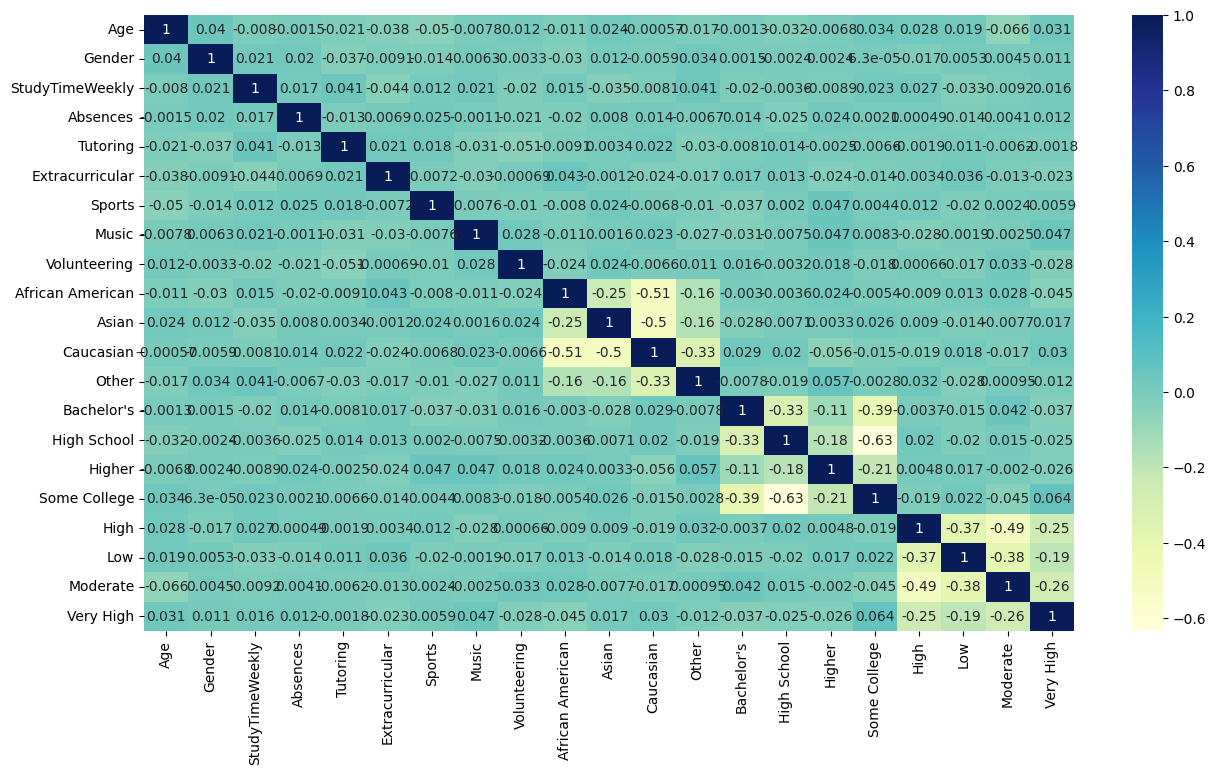

In [ ]:
# COVARIANCE MATRIX / CORRELATION MATRIX
cov_matrix = pd.DataFrame(pca.get_covariance(), index=X.columns, columns=X.columns)

plt.figure(figsize=(15, 8))
sns.heatmap(cov_matrix, annot=True, cmap="YlGnBu")

In [ ]:
# EIGEN VALUE
explained_variance = pca.explained_variance_.reshape(-1)
pd.DataFrame(explained_variance, index=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18'], columns = ['Explained Variance']).T

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18
Explained Variance,1.682267,1.638215,1.511977,1.356459,1.319196,1.260143,1.188592,1.148241,1.117356,1.09817,1.036607,1.023085,0.988195,0.967366,0.95378,0.948982,0.891506,0.8806


In [ ]:
# EIGEN VALUE RATIO
explained_variance_ratio = pca.explained_variance_ratio_.reshape(-1)
pd.DataFrame(explained_variance_ratio, index=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18'], columns = ['Explained Variance Ratio']).T

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18
Explained Variance Ratio,0.080067,0.07797,0.071962,0.06456,0.062787,0.059976,0.056571,0.05465,0.05318,0.052267,0.049337,0.048693,0.047033,0.046041,0.045395,0.045167,0.042431,0.041912


In [ ]:
# EIGEN VECTOR
pd.DataFrame(pca.components_, columns=X.columns)

,Age,Gender,StudyTimeWeekly,Absences,Tutoring,Extracurricular,Sports,Music,Volunteering,African American,...,Caucasian,Other,Bachelor's,High School,Higher,Some College,High,Low,Moderate,Very High
0,0.090759,0.016562,0.032564,0.014531,-0.028590,-0.020147,0.010270,0.016606,-0.023538,0.101953,...,-0.282075,0.076359,-0.151618,-0.577512,-0.001222,0.668725,0.018744,0.080070,-0.171197,0.120737
1,0.048238,0.003968,0.004553,0.028008,0.030823,-0.052616,-0.024964,0.049853,-0.034595,-0.406351,...,0.711432,-0.198830,-0.002279,-0.185039,-0.124375,0.236500,-0.056645,0.110698,-0.144224,0.151191
2,0.105410,-0.011393,0.045630,-0.010984,0.018750,-0.002568,0.016872,-0.034878,-0.039660,-0.078566,...,-0.014371,0.053563,-0.115362,0.184438,0.006407,-0.092870,0.677931,-0.004436,-0.674447,0.010650
3,0.036766,-0.015802,-0.100973,-0.070526,0.056425,0.128301,-0.038425,0.024129,-0.087272,0.175714,...,-0.071922,-0.163015,-0.227427,0.241493,-0.012562,-0.054364,-0.387354,0.726697,-0.305270,0.075009
4,-0.004075,-0.055165,-0.043016,-0.004547,-0.016972,0.132204,-0.109436,-0.118627,-0.007729,0.341265,...,0.016936,0.035874,0.560484,-0.369165,0.118210,-0.122963,0.127797,0.252514,-0.127198,-0.323572
5,0.146367,0.132026,-0.185059,0.077156,-0.094316,-0.036678,-0.050159,0.025597,0.155290,-0.486252,...,-0.048509,0.018971,0.452728,-0.174515,0.112746,-0.225889,-0.106042,0.175059,-0.102158,0.078469
6,0.007301,0.212978,0.212946,0.065676,-0.158475,-0.236539,0.040348,0.207167,0.045826,-0.101015,...,-0.027757,0.604591,-0.125043,-0.013222,0.462786,-0.106338,-0.137970,0.112454,-0.071202,0.159894
7,0.176067,0.050780,0.118181,0.045234,-0.039814,-0.066027,-0.139262,0.141335,-0.143304,0.316329,...,-0.080994,-0.167769,0.296036,-0.002174,-0.151561,-0.151237,-0.115350,-0.242470,-0.160482,0.714136
8,-0.294900,-0.267460,0.047787,0.231321,0.283440,0.010199,0.498858,0.180444,-0.149472,0.052271,...,0.050946,-0.303574,0.013781,-0.146265,0.496737,-0.099044,0.014355,-0.034491,-0.052160,0.099943
9,0.216486,-0.014326,-0.245568,-0.092173,-0.424672,-0.147235,-0.092005,0.427464,0.422847,0.207526,...,0.074688,-0.380048,-0.154834,-0.009286,0.261003,0.005342,0.100300,-0.055252,0.025842,-0.112321


## DATA TRAINING

In [ ]:
# DATA SPLITTING | 70% training | 10% validation | 20% testing

X_temp, X_test, y_temp, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.125, random_state=42)

In [ ]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)

cv_scores = []

# CROSS-VALIDATION
for train_index, val_index in kf.split(X_train):
    X_sub_train, X_sub_val = X_train.iloc[train_index], X_train.iloc[val_index]
    y_sub_train, y_sub_val = y_train.iloc[train_index], y_train.iloc[val_index]

    model = LinearRegression()
    model.fit(X_sub_train, y_sub_train)

    val_score = model.score(X_sub_val, y_sub_val)
    cv_scores.append(val_score)

In [ ]:
cv_scores_df = pd.DataFrame({
    'Fold': [f"Fold {i+1}   |" for i in range(len(cv_scores))],
    'Score': cv_scores
})
cv_scores_df.loc[len(cv_scores_df)] = ['Mean Score   |', np.mean(cv_scores)]

print("\nCross-validation Scores:")
print(cv_scores_df.to_string(index=False, justify='center'))


Cross-validation Scores:
     Fold        Score 
    Fold 1   | 0.954639
    Fold 2   | 0.957086
    Fold 3   | 0.954413
    Fold 4   | 0.952492
    Fold 5   | 0.947515
    Fold 6   | 0.953122
    Fold 7   | 0.958623
    Fold 8   | 0.963570
    Fold 9   | 0.940382
   Fold 10   | 0.941296
Mean Score   | 0.952314


In [ ]:
final_model = LinearRegression()
final_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = final_model.predict(X_test)

## DATA ASSESMENT

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)

print("Evaluasi pada Testing Set:")
print(f"  Mean Absolute Error : {mae:.4f}")
print(f"  Mean Squared Error  : {mse:.4f}")
print(f"  RMSE                : {rmse:.4f}")

Evaluasi pada Testing Set:
  Mean Absolute Error : 0.1642
  Mean Squared Error  : 0.0422
  RMSE                : 0.2054


## OUTPUT

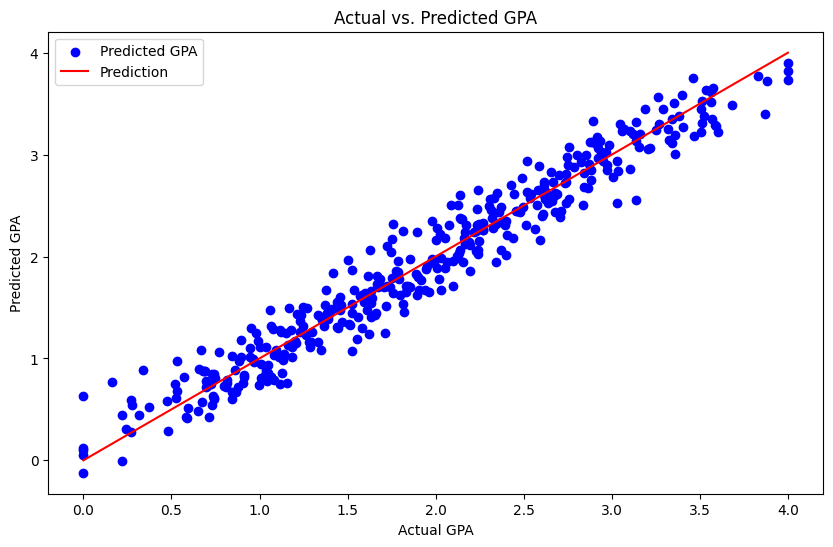

In [ ]:
# ACTUAL vs PREDICTED GPA PLOT
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted GPA')
plt.plot(np.linspace(0, max(y_test), 100), np.linspace(0, max(y_test), 100), color='red', label='Prediction')
plt.xlabel('Actual GPA')
plt.ylabel('Predicted GPA')
plt.title('Actual vs. Predicted GPA')
plt.legend()
plt.show()

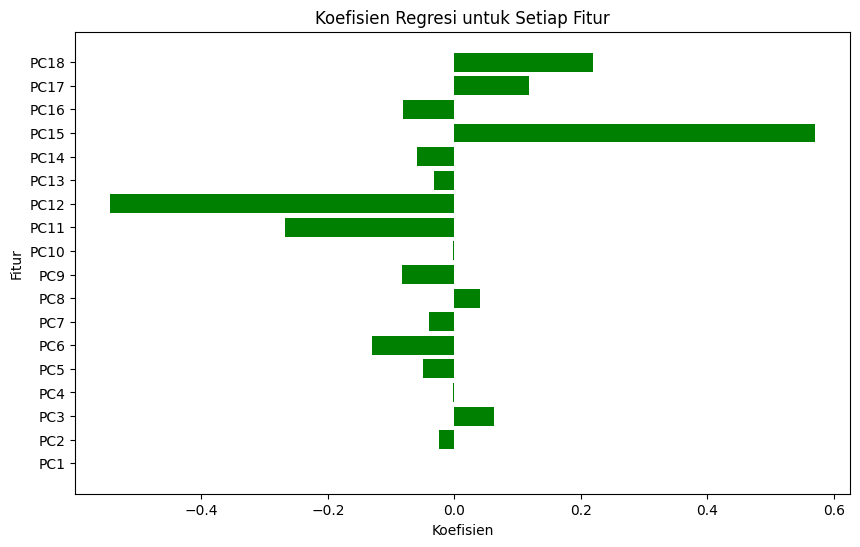

In [ ]:
# REGRESSION COEFFICIENT PLOT
coefficients = model.coef_
features = X_pca.columns

plt.figure(figsize=(10, 6))
plt.barh(features, coefficients, color='green')
plt.title('Koefisien Regresi untuk Setiap Fitur')
plt.xlabel('Koefisien')
plt.ylabel('Fitur')
plt.show()

In [ ]:
print(f"Intercept (c) : {model.intercept_:.4f}\n")

print("Coefficients (m):")
for i, coef in enumerate(model.coef_):
    print(f"  - {X_pca.columns[i]:<10}: {coef:.4f}")

Intercept (c) : 1.9444

Coefficients (m):
  - PC1       : -0.0007
  - PC2       : -0.0238
  - PC3       : 0.0629
  - PC4       : -0.0015
  - PC5       : -0.0504
  - PC6       : -0.1299
  - PC7       : -0.0405
  - PC8       : 0.0401
  - PC9       : -0.0835
  - PC10      : -0.0022
  - PC11      : -0.2679
  - PC12      : -0.5440
  - PC13      : -0.0325
  - PC14      : -0.0591
  - PC15      : 0.5702
  - PC16      : -0.0818
  - PC17      : 0.1177
  - PC18      : 0.2194


In [ ]:
print("Persamaan regresi linear:")
equation = "y = "
for i, coef in enumerate(model.coef_):
    equation += f"({coef:.4f} * X{i+1}) + "
equation += f"{model.intercept_:.4f}"
print(equation)

Persamaan regresi linear:
y = (-0.0007 * X1) + (-0.0238 * X2) + (0.0629 * X3) + (-0.0015 * X4) + (-0.0504 * X5) + (-0.1299 * X6) + (-0.0405 * X7) + (0.0401 * X8) + (-0.0835 * X9) + (-0.0022 * X10) + (-0.2679 * X11) + (-0.5440 * X12) + (-0.0325 * X13) + (-0.0591 * X14) + (0.5702 * X15) + (-0.0818 * X16) + (0.1177 * X17) + (0.2194 * X18) + 1.9444


## DATA INPUT

In [ ]:
import time
import psutil

# INPUT YOUR DATA:
new_data = {
    'Age': 15,
    'Gender': 0,          # 0 = Male | 1 = Female
    'StudyTimeWeekly': 20,
    'Absences': 2,
    'Tutoring': 1,        # 0 = No | 1 = Yes
    'Extracurricular': 1, # 0 = No | 1 = Yes
    'Sports': 0,          # 0 = No | 1 = Yes
    'Music': 0,           # 0 = No | 1 = Yes
    'Volunteering': 1,    # 0 = No | 1 = Yes

    # Ethnicity | Choose 1
    'African American': 0,
    'Asian': 1,
    'Caucasian': 0,
    'Other': 0,

    # ParentalEducation | Choose 1
    "Bachelor's": 1,
    'High School': 0,
    'Higher': 0,
    'Some College': 0,

    # ParentalSupport | Choose 1
    'High': 1,
    'Low': 0,
    'Moderate': 0,
    'Very High': 0
}

start_time = time.time()
process = psutil.Process()
start_memory = process.memory_info().rss

new_data_df = pd.DataFrame([new_data])
new_data_scaled = scaler.transform(new_data_df)
new_data_scaled_df = pd.DataFrame(new_data_scaled, columns=X.columns)
new_data_pca = pca.transform(new_data_scaled_df)
predicted_gpa = model.predict(new_data_pca)

end_time = time.time()
end_memory = process.memory_info().rss

print(f"Prediksi GPA: {predicted_gpa[0]:.2f}")

execution_time = end_time - start_time
memory_used = (end_memory - start_memory) / (1024 ** 2)

print(f"Waktu komputasi: {execution_time:.4f} detik")
print(f"Penggunaan memori: {memory_used:.4f} MB")

Prediksi GPA: 3.76
Waktu komputasi: 0.0090 detik
Penggunaan memori: 0.0000 MB


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
# import joblib

# # Simpan model, scaler, dan PCA ke file
# joblib.dump(model, 'model_gpa.pkl')
# joblib.dump(scaler, 'scaler.pkl')
# joblib.dump(pca, 'pca.pkl')